In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
#API FILE
!kaggle datasets download patrickfleith/nasa-battery-dataset

Dataset URL: https://www.kaggle.com/datasets/patrickfleith/nasa-battery-dataset
License(s): copyright-authors
 79% 181M/228M [00:00<00:00, 1.73GB/s]
100% 228M/228M [00:00<00:00, 1.28GB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('nasa-battery-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
#NORMAL FILE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#SKLEARN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#DEEP LEARNIN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [9]:
df = pd.read_csv('/content/cleaned_dataset/metadata.csv')
df.head()

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.6743047446975208,NaN,NaN
1,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,NaN,0.05605783343888099,0.20097016584458333
2,charge,[2010. 7. 21. 17. 25. ...,4,B0047,2,3,00003.csv,NaN,NaN,NaN
3,impedance,[2010 7 21 20 31 5],24,B0047,3,4,00004.csv,NaN,0.05319185850921101,0.16473399914864734
4,discharge,[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...,4,B0047,4,5,00005.csv,1.5243662105099023,NaN,NaN


In [10]:
df.describe()

,ambient_temperature,test_id,uid
count,7565.000000,7565.000000,7565.000000
mean,20.017713,176.012558,3783.000000
std,11.082914,152.174147,2183.971726
min,4.000000,0.000000,1.000000
25%,4.000000,55.000000,1892.000000
50%,24.000000,129.000000,3783.000000
75%,24.000000,255.000000,5674.000000
max,44.000000,615.000000,7565.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   type                 7565 non-null   object
 1   start_time           7565 non-null   object
 2   ambient_temperature  7565 non-null   int64 
 3   battery_id           7565 non-null   object
 4   test_id              7565 non-null   int64 
 5   uid                  7565 non-null   int64 
 6   filename             7565 non-null   object
 7   Capacity             2794 non-null   object
 8   Re                   1956 non-null   object
 9   Rct                  1956 non-null   object
dtypes: int64(3), object(7)
memory usage: 591.1+ KB


In [13]:
df.isnull().sum()

,0
type,0
start_time,0
ambient_temperature,0
battery_id,0
test_id,0
uid,0
filename,0
Capacity,4771
Re,5609
Rct,5609


In [15]:
#removing irrelevant information
df.drop(['start_time', 'battery_id', 'test_id', 'uid','filename'], axis =1, inplace = True)

In [17]:
df.head()

,type,ambient_temperature,Capacity,Re,Rct
0,discharge,4,1.6743047446975208,NaN,NaN
1,impedance,24,NaN,0.05605783343888099,0.20097016584458333
2,charge,4,NaN,NaN,NaN
3,impedance,24,NaN,0.05319185850921101,0.16473399914864734
4,discharge,4,1.5243662105099023,NaN,NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   type                 7565 non-null   object
 1   ambient_temperature  7565 non-null   int64 
 2   Capacity             2794 non-null   object
 3   Re                   1956 non-null   object
 4   Rct                  1956 non-null   object
dtypes: int64(1), object(4)
memory usage: 295.6+ KB


In [20]:
df['type'].value_counts()

,count
type,
charge,2815
discharge,2794
impedance,1956


,count
Re,
0.0968087979207628,1
0.05605783343888099,1
0.05319185850921101,1
0.05963791501051059,1
0.09559865013101355,1
...,...
0.06203113143529375,1
0.05353424494363978,1
0.057516600514537095,1


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
model = LabelEncoder()
df['type'] = model.fit_transform(df['type'])

In [26]:
print(df['type'])

0       1
1       2
2       0
3       2
4       1
       ..
7560    2
7561    1
7562    0
7563    1
7564    0
Name: type, Length: 7565, dtype: int64


In [28]:
df['type'].value_counts()

,count
type,
0,2815
1,2794
2,1956


In [30]:
df['Re'] = pd.to_numeric(df['Re'], errors='coerce')
df['Rct'] = pd.to_numeric(df['Rct'], errors='coerce')
df['Capacity'] = pd.to_numeric(df['Capacity'], errors='coerce')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   type                 7565 non-null   int64  
 1   ambient_temperature  7565 non-null   int64  
 2   Capacity             2769 non-null   float64
 3   Re                   1947 non-null   float64
 4   Rct                  1947 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 295.6 KB


In [33]:
df['Re'].fillna(df['Re'].mean(), inplace=True)
df['Rct'].fillna(df['Rct'].mean(), inplace=True)
df['Capacity'].fillna(df['Capacity'].mean(), inplace=True)

/tmp/ipython-input-2885315369.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Re'].fillna(df['Re'].mean(), inplace=True)
/tmp/ipython-input-2885315369.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [35]:
df.isnull().sum()

,0
type,0
ambient_temperature,0
Capacity,0
Re,0
Rct,0


In [36]:
x = df.drop('ambient_temperature', axis=1)
y = df['ambient_temperature']

In [37]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [41]:
print(x_train.shape, x_test.shape)

(6052, 4) (1513, 4)


**MODEL BUILDING**

In [48]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
history = model.fit(x_train, y_train, epochs=100, batch_size=34, validation_data=(x_test, y_test))

Epoch 1/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 433.5788 - val_loss: 134.6515
Epoch 2/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 98.9480 - val_loss: 134.7646
Epoch 3/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 93.9285 - val_loss: 131.0169
Epoch 4/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 95.9886 - val_loss: 128.0514
Epoch 5/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 96.1829 - val_loss: 126.8471
Epoch 6/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 93.6177 - val_loss: 124.1532
Epoch 7/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 93.1965 - val_loss: 121.0661
Epoch 8/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 94.9581 - val_loss: 122.6597
Epoch 9/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 91.6156 - val_loss: 119.2200
Epoch 10/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 92.6163 - val_loss: 121.9609
Epoch 11/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 96.8084 - val_loss: 117.2364
Epoch 1

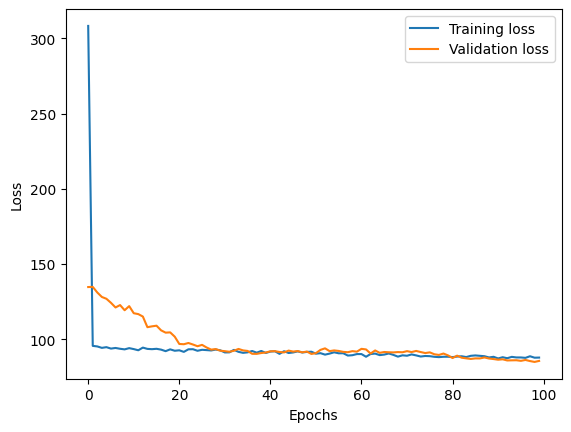

In [50]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [52]:
model.evaluate(x_test, y_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 92.5452  


85.50899505615234

In [ ]:
f